# Fruit juice ultrafiltration 

Concentration of a fruit juice is achieved by ultrafiltration on a 6 mm diameter, 1.2 m long tubular membrane. Nanofiltration is carried out in tangential mode (cross-flow filtration), i.e. with a flow velocity in the tube (parallel to the membrane) and a permeation velocity (perpendicular to the membrane). The fruit juice has a mass concentration of 0.2% and is totally retained by the membrane.


*Data :*
- *Fruit juice 0.2% mass : $\rho$=1200 kg/m3, $\mu$=0,001 Po, D=7.10-10 m2.s-1*
- *Osmotic pressure (eq. 31 TI J2789) : $\Pi(bar)=\frac{133.75c}{100-c}$  with concentration c in mass %*


**1. Considering the accumulation of fruit juice at the membrane surface, calculate the fruit juice concentration at the membrane surface, cm, for a permeation flux of 10-6 m/s and 2.10-6 m/s and circulation velocities of 0.05 and 0.1 m/s. Comment on results.**

>During filtration, there is a coupling between convection due to permeation, J, which brings solutes (or colloids) towards the membrane, and diffusion, D, in the boundary layer, $\delta$, which generates "retro"-transport from the membrane to the solution (or dispersion). It can be demonstrated (see course) by performing a differential balance on a volume element in the boundary layer that the concentration profile is exponential:
$$c=c_b e^{Jx/D}$$
>The concentration at the membrane, $c_m$, is then :
$$c_m=c_b e^{Pe}$$
>where, $Pe=\frac{J\delta}{D}$, is the Peclet number characterizing the ratio $\frac{advective~flux}{diffusive~flux}$. To calculate the Péclet number, we need to estimate the thickness of the boundary layer. This can be estimated from a correlation between dimensionless numbers for transfer in a tube.
$$Sh=1.86(Re~Sc~\frac{d_H}{L})^{0.33}$$ for Re<2100
$$Sh=0.023Re^{0.8}Sc^{0.33}$$ for Re>2100
> The code allows ro :
>1. calculate the boundary layer thickness
>2. calculate the Peclet number
>3. calculer the concentration at the membrane

The boundary layer thickness is  256.7 micrometers for a tangential velocity of  0.05 m/s
The boundary layer thickness is  204.2 micrometers for a tangential velocity of  0.1 m/s

   J   \   u    |              0.05                0.1
------------------------------------------------------------------------------
                |       Pe=    0.367               0.292
  1.00e-06      |          
                |       cm=    0.289               0.268
------------------------------------------------------------------------------
                |       Pe=    0.733               0.583
  2.00e-06      |          
                |       cm=    0.416               0.358


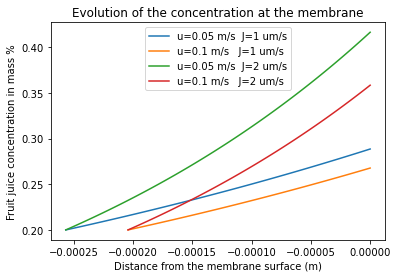

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
#DATA
#Solution
c0=0.2 #% massique
D=7.e-10 #m2/s
ro=1200 #kg m-3
mu=0.001 #Pa.s
#membrane
d_H=6e-3 #m
L=1.2 #m
# conditions hydrodynamiques
u=[0.05, 0.1] #m/s
J=[1.e-6,2.e-6] #m/s

#Calcul de l'épaisseur de couche limite, du nombre de Péclet et de la concentration à la membrane
deltal=np.zeros(len(u))
Re=np.zeros(len(u))
Sh=np.zeros(len(u))
Pe=np.zeros(len(u)*len(J))
cm=np.zeros(len(u)*len(J))
Sc=mu/(ro*D)

for i in range(len(u)):
    Re[i]=ro*u[i]*d_H/mu
    if Re[i]<2100:
        Sh[i]=1.86*(Re[i]*Sc*d_H/L)**0.33
    else:
        Sh[i]=0.023*Re[i]**0.8*Sc**0.33
    deltal[i]=d_H/Sh[i]
    print ('The boundary layer thickness is ', round(deltal[i]*1e6, 1),'micrometers for a tangential velocity of ', u[i],'m/s' )
    for j in range(len(J)):
        Pe[i+len(u)*j]=J[j]*deltal[i]/D
        cm[i+len(u)*j]=c0*np.exp(Pe[i+len(u)*j])
print()  
print ('   J   \   u    |             ', round(u[0],3),'              ', round(u[1],3))
print ('------------------------------------------------------------------------------')
print ('                |       Pe=   ', round(Pe[0],3), '             ', round(Pe[1],3))
print (' ', "%.2e"%J[0],'     |          ')
print ('                |       cm=   ', round(cm[0],3), '             ', round(cm[1],3))
print ('------------------------------------------------------------------------------')
print ('                |       Pe=   ', round(Pe[2],3), '             ', round(Pe[3],3))
print (' ', "%.2e"%J[1],'     |          ')
print ('                |       cm=   ', round(cm[2],3), '             ', round(cm[3],3))

#Tracé du profil de concentration près de la membrane
x0=np.linspace(-deltal[0],0,100)
x1=np.linspace(-deltal[1],0,100)
c_0=c0*np.exp(Pe[0]*(1+x0/deltal[0]))
c_1=c0*np.exp(Pe[1]*(1+x1/deltal[1]))
c_2=c0*np.exp(Pe[2]*(1+x0/deltal[0]))
c_3=c0*np.exp(Pe[3]*(1+x1/deltal[1]))
plt.plot(x0,c_0, label='u=0.05 m/s  J=1 um/s') 
plt.plot(x1,c_1, label='u=0.1 m/s   J=1 um/s')
plt.plot(x0,c_2, label='u=0.05 m/s  J=2 um/s')
plt.plot(x1,c_3, label='u=0.1 m/s   J=2 um/s')
plt.legend(loc='upper center')
plt.title('Evolution of the concentration at the membrane')
plt.xlabel('Distance from the membrane surface (m)')
plt.ylabel('Fruit juice concentration in mass %')
plt.show()

>It can be seen that increasing the permeation flux results in greater accumulation at the membrane. On the other hand, increasing the tangential velocity reduces accumulation at the membrane. This velocity is known as the tangential sweep velocity, as it reduces accumulation at the membrane: the thickness of the boundary layer is smaller, which favors material transfer by diffusion into the solution. It should be noted, however, that increasing tangential velocity requires energy, so a compromise must be found.

The solvent flux through the membrane is directly related to the concentration at the filter surface by the following relationship : 			 
$$J=\frac{\Delta P-\Delta\Pi}{\mu R_m}$$
where
- $\Delta P$ is the pression difference through the membrane (transmembrane pressure)
- $\Delta\Pi$ is the osmotic pressure difference through the membrane $\Pi(c_m)-\Pi(c_p)=\Pi(c_m)$ if the membrane does not let the solute pass
- $R_m$ is the hydraulic resistance of the membrane = 1.10+14 m-1

**2. Using the above relationships, how can you calculate the membrane concentration and permeation flux for a given pressure difference?**

> The mass transfer analysis allow to link the concentration at the membrane, $c_m$ to the operating conditions, Pe :
$$c_m=c_b e^{Pe}$$
>The analysis of the momemtum transfer (fluid mechanic) allow to predict the effet of the concentration at the membrane, $c_m$, on the permeate flux, $J$, via the counter osmotic pressure, $\Pi(c_m)$) with a modified Darcy law :
$$J=\frac{\Delta P-\Pi(c_m)}{\mu R_m}$$
>We therefore have a system of two equations with two unknowns. If the trans-membrane pressure is fixed, the unknowns are the permeation flux and the membrane concentration. If the flux through the membrane is known, the unknowns are the trans-membrane pressure and the membrane concentration. There is no analytical solution for these equations, as the system is non-linear. However, it is possible to combine the two equations to obtain a single-unknown equation, for example, as a function of $c_m$ :
$$\frac{D}{\delta}ln(\frac{c_m}{c_0})-\frac{\Delta P-10^{+5}\frac{133.75c_m}{100-c_m}}{\mu R_m}=0$$


**3. Realise this calculus for pressure of 2, 5 and 10 bars and for tangential velocities of 0.05 m/s and 0.1 m/s.**

>The code allows to solve the system of equation as follows :
1. function for the osmotic pressure calculation
2. definition of the function to solve to determine cm
3. main program with loops to calculate cm for differents values of boundary layers and pressure. Values of $c_m$ and $J$ are save in an array.


In [4]:
Rm=1e14
#Fonction pour le calcul de la pression osmotique en Pa
def PI(c):
    PI=1.e5*(133.75*c/(100.-c))
    return PI
#Foncion à résoudre pour déterminer la concentration à la membrane
def f(cm):
    f=(D/delta)*np.log(cm/c0)-(DP-PI(cm))/(mu*Rm)
    return f
#creation des tableaux de valeurs
DPl=np.linspace(0,20.e5,21)
cm=np.zeros(len(deltal)*len(DPl))
J=np.zeros(len(deltal)*len(DPl))
print ('u(m/s)    delta(m)    PTM(Pa)    cm(%)       J(m/s)       ')
for i in range(len(deltal)):
    for j in range(len(DPl)):
        delta=deltal[i]
        DP=DPl[j]
        cm[j+len(DPl)*i]=newton(f,c0)
        J[j+len(DPl)*i]=(D/delta)*np.log(cm[j+len(DPl)*i]/c0) 
        if j%2 ==0:
            print (u[i],'   ',  "%.2e"%delta,'   ', DP,'   ',round(cm[j+len(DPl)*i],3),'   ', "%.2e"%J[j+len(DPl)*i]) 
 

u(m/s)    delta(m)    PTM(Pa)    cm(%)       J(m/s)       
0.05     2.57e-04     0.0     0.183     -2.45e-07
0.05     2.57e-04     200000.0     0.35     1.53e-06
0.05     2.57e-04     400000.0     0.634     3.15e-06
0.05     2.57e-04     600000.0     1.065     4.56e-06
0.05     2.57e-04     800000.0     1.651     5.76e-06
0.05     2.57e-04     1000000.0     2.374     6.75e-06
0.05     2.57e-04     1200000.0     3.208     7.57e-06
0.05     2.57e-04     1400000.0     4.121     8.25e-06
0.05     2.57e-04     1600000.0     5.09     8.83e-06
0.05     2.57e-04     1800000.0     6.095     9.32e-06
0.05     2.57e-04     2000000.0     7.123     9.74e-06
0.1     2.04e-04     0.0     0.186     -2.49e-07
0.1     2.04e-04     200000.0     0.317     1.58e-06
0.1     2.04e-04     400000.0     0.523     3.30e-06
0.1     2.04e-04     600000.0     0.83     4.88e-06
0.1     2.04e-04     800000.0     1.256     6.30e-06
0.1     2.04e-04     1000000.0     1.805     7.54e-06
0.1     2.04e-04     1200000.0   

**4. Plot permeation flux versus pressure difference for both speeds and conclude.**

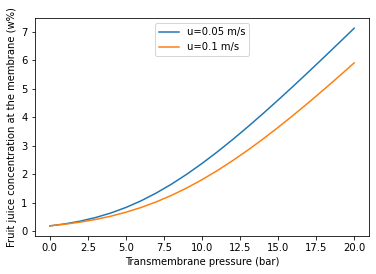

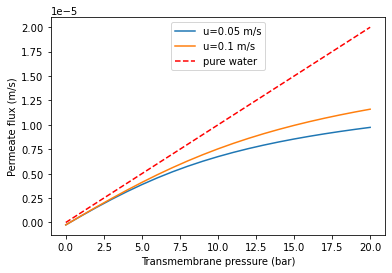

In [5]:
#Tracé de la concentration à la membrane
plt.plot(DPl/1e5,cm[:j+1], label='u=0.05 m/s') 
plt.plot(DPl/1e5,cm[j+1:], label='u=0.1 m/s') 
plt.legend(loc='upper center')
#plt.title('Evolution de la concentration au voisinage de la membrane en fonction de pression trans-membranaire')
plt.xlabel('Transmembrane pressure (bar)')
plt.ylabel('Fruit juice concentration at the membrane (w%)')
plt.show()        
        
#Tracé du flux de perméation
plt.plot(DPl/1e5,J[:j+1], label='u=0.05 m/s') 
plt.plot(DPl/1e5,J[j+1:], label='u=0.1 m/s')
plt.plot(DPl/1e5,DPl/(mu*Rm), 'r--', label='pure water')
plt.legend(loc='upper center')
#plt.title('Evolution du flux de perméation en fonction de pression trans-membranaire')
plt.xlabel('Transmembrane pressure (bar)')
plt.ylabel('Permeate flux (m/s)')
plt.show() 

>Note that **increasing pressure** always leads to an increase in permeation flux. However, this increase becomes less significant at higher pressures, as the increase in membrane concentration generates an osmotic counter-pressure which limits permeation. At pressures below the osmotic pressure of the dispersion, permeation fluxes are negative: this is a regime of osmosis, and permeation flux is directed towards higher concentrations (i.e. from the permeate to the concentrate). At higher pressures, the fluid is forced to flow from the concentrate to the filtrate: this is the reverse osmosis regime. All you have to do is modify the membrane properties, $R_m$, and the variation in osmotic pressure, $\Pi$, as a function of concentration (the osmotic pressure of salts will be very high: seawater has an osmotic pressure of 25 bar). We will therefore also need to examine higher pressure ranges (>25 bar) to describe reverse osmosis. 
>
> We note that the **increase in tangential velocity** leads to a reduction in membrane concentration (effect of tangential scavenging, which reduces the thickness of the boundary layer) and thus increases permeation flux (osmotic back pressure is lower).